<a href="https://colab.research.google.com/github/Anushkagupta060/Sentiment-Analysis/blob/main/sentiment_anlysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#SENTIMENT ANALYSIS IN PYTHON


Read in **Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("train_realistic.csv")
data.head()

,text,label
0,I just finished watching this movie and I have...,0
1,I'm really disappointed with this movie. The p...,1
2,What an incredible experience this was! From t...,0
3,This was a complete disaster from start to fin...,1
4,I absolutely loved this movie! Everything abou...,0


In [ ]:
data.shape

(40000, 2)

In [ ]:
data=data.iloc[:10000,:]

In [ ]:
data.shape

(10000, 2)

WORKING WITH **LABEL**

In [ ]:
data['label'].value_counts()

,count
label,
0,5000
1,5000


<Axes: ylabel='label'>

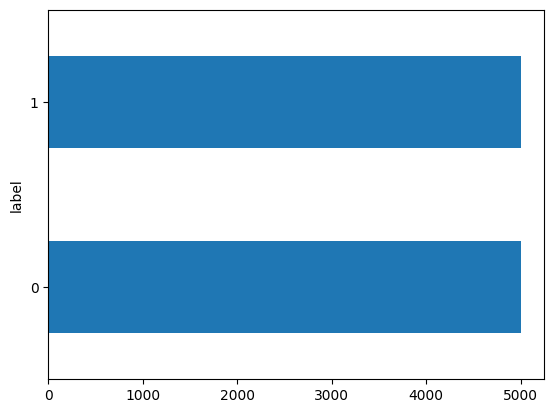

In [ ]:
data['label'].value_counts().plot(kind='barh')

<Axes: ylabel='count'>

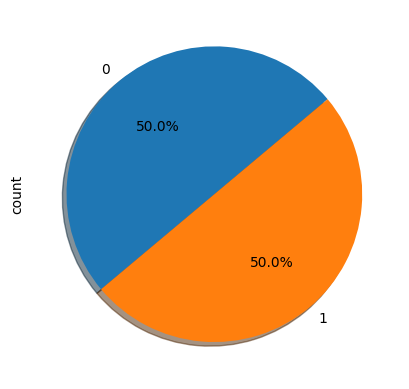

In [ ]:
data['label'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=40, shadow=True)

WORKING WITH **TEXT**


In [ ]:
data['text'][999]

"I absolutely hated this movie and I rarely say that about any film. Everything about it was wrong - the story was boring, the characters were annoying, and the pacing was painfully slow. I found myself checking my phone constantly because I was so bored. I honestly don't understand how this got made or why anyone would enjoy it."

**CLEANING- LIKE REMOVE EXTRA WORDS,STOPWORDS,EXTRACT EMOJHIES, REMOVE EXTRA CHARECTER,PUNCTUATION,SYMBOLS,LOWERCASE,TOKENIZATION**

In [ ]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download stopwords
nltk.download('stopwords')

stopwords_set = set(stopwords.words('english'))
emoji_pattern = re.compile(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)')


def preprocessing(text):
    text = re.sub('<[^>]*>', '', text)
    emojis = emoji_pattern.findall(text)
    text = re.sub(r'[\W+]', ' ', text.lower()) + ' '.join(emojis).replace('-', '')

    prter = PorterStemmer()
    text = [prter.stem(word) for word in text.split() if word not in stopwords_set]

    return " ".join(text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
preprocessing('this is my tags <h1> :) <p>helo world<p> <div> <div> </h2>')

'tag helo world :)'

In [ ]:
data['text'] = data['text'].apply(lambda x: preprocessing(x))

In [ ]:
data['text']

,text
0,finish watch movi say exceed expect storylin c...
1,realli disappoint movi plot made absolut sens ...
2,incred experi first scene complet drawn stori ...
3,complet disast start finish act terribl felt l...
4,absolut love movi everyth perfect act direct m...
...,...
9995,complet wast time regret watch two hour life n...
9996,truli remark inspir stori touch heart mani way...
9997,realli disappoint movi plot made absolut sens ...
9998,fantast experi turn masterpiec touch soul star...


**VISUALIZING NEGATIVE AND POSITIVE WORDS**

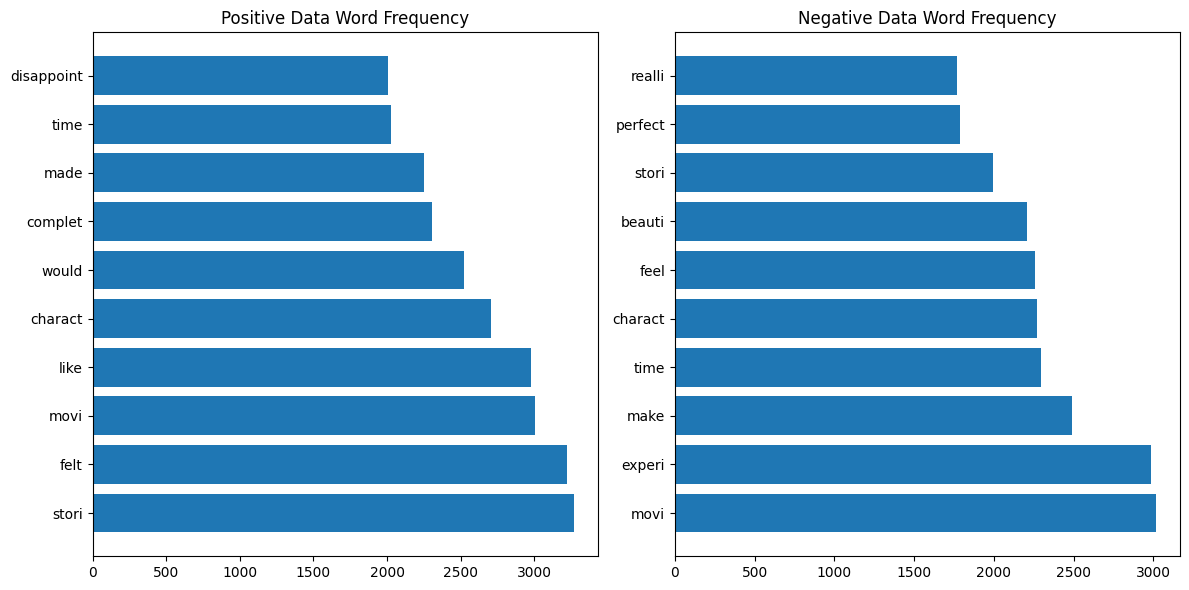

In [ ]:
positivedata = data[data['label'] == 1]
positivedata = positivedata['text']
negdata = data[data['label'] == 0]
negdata = negdata['text']

import matplotlib.pyplot as plt
from collections import Counter

# Positive data
positivedata_words = ' '.join(positivedata).split()
positivedata_word_counts = Counter(positivedata_words)
positivedata_common_words = positivedata_word_counts.most_common(10)  # Display top 10 common words

# Negative data
negdata_words = ' '.join(negdata).split()
negdata_word_counts = Counter(negdata_words)
negdata_common_words = negdata_word_counts.most_common(10)  # Display top 10 common words

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Positive data word frequency
axes[0].barh(range(len(positivedata_common_words)), [count for _, count in positivedata_common_words], align='center')
axes[0].set_yticks(range(len(positivedata_common_words)))
axes[0].set_yticklabels([word for word, _ in positivedata_common_words])
axes[0].set_title('Positive Data Word Frequency')

# Negative data word frequency
axes[1].barh(range(len(negdata_common_words)), [count for _, count in negdata_common_words], align='center')
axes[1].set_yticks(range(len(negdata_common_words)))
axes[1].set_yticklabels([word for word, _ in negdata_common_words])
axes[1].set_title('Negative Data Word Frequency')

plt.tight_layout()
plt.show()

**TF-IDF VECTORIZER TO CONVERT THE RAW DOCUMNTS INTO FEATURE MATRIX**

In [ ]:
 from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,use_idf=True,norm='l2',smooth_idf=True)
y=data.label.values
x=tfidf.fit_transform(data.text)

**TRAINING MACHINE LEARNING MODEL FOR SENTIMENT ANALYSIS**-to train a ml model  and i split the data into 50 percent training and 5o percent testing dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.5,shuffle=False)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(X_train,y_train)
y_pred = clf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.3s finished


**ACCURACY**

In [ ]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


**PICKLE FILES**

In [ ]:
import pickle
pickle.dump(clf,open('clf.pkl','wb'))
pickle.dump(tfidf,open('tfidf.pkl','wb'))

PREDICTION

In [ ]:
def prediction(comment):
    preprocessed_comment = preprocessing(comment)
    comment_list = [preprocessed_comment]  # Wrap the preprocessed comment in a list
    comment_vector = tfidf.transform(comment_list)
    prediction = clf.predict(comment_vector)[0]
    return prediction


prediction=prediction('she is good girl')
# prediction = prediction('one cerebr insight movi ever seen script languag costum sceneri plot charact etc suprem bore watch intens even listen movi work mani time lost count scarlett age grace acquir wisdom beyond year end movi take tara ireland famili origin see result anoth civil war play time irish english movi depict doubl standard men time man still respect girlfriend whore woman mere seen privat place man societi accus improprieti cours scarlett alway think outsid box break rule necessari creat need chang help peopl surviv scarlett beauti definit bone strength self esteem wisdom grow age rememb line confront much plate tomorrow anoth day way carri determin courag learn experi good movi show daughter teach woman import respect men especi handsom one two side may treat woman differ depend act respect attract woman need learn movi teach movi like therapi better gone wind second part take place ireland anyon irish decent cherish sceneri peopl scarlett charact within')

In [ ]:
if prediction == 1:
    print("positive comment")
else:
    print("negative comment")


negative comment


In [ ]:
data['text'][403]

'realli disappoint left frustrat confus execut poor felt like wast time mani issu pace charact develop overal qualiti enjoy expect much better'